In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline 

In [ ]:
df= pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes",index_col=0)
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43,3,3,4,1,2,2,female
2,Labour,36,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,2,male
4,Labour,24,4,2,2,1,4,0,female
5,Labour,41,2,2,1,1,6,2,male


Data Ingestion 
1. Read the dataset. Do the descriptive statistics and do null value condition check. 

In [ ]:
df.shape

(1525, 9)

In [ ]:
df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [ ]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [ ]:
df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [ ]:
df.duplicated().sum()

8

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(1517, 9)

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




 2.Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed i

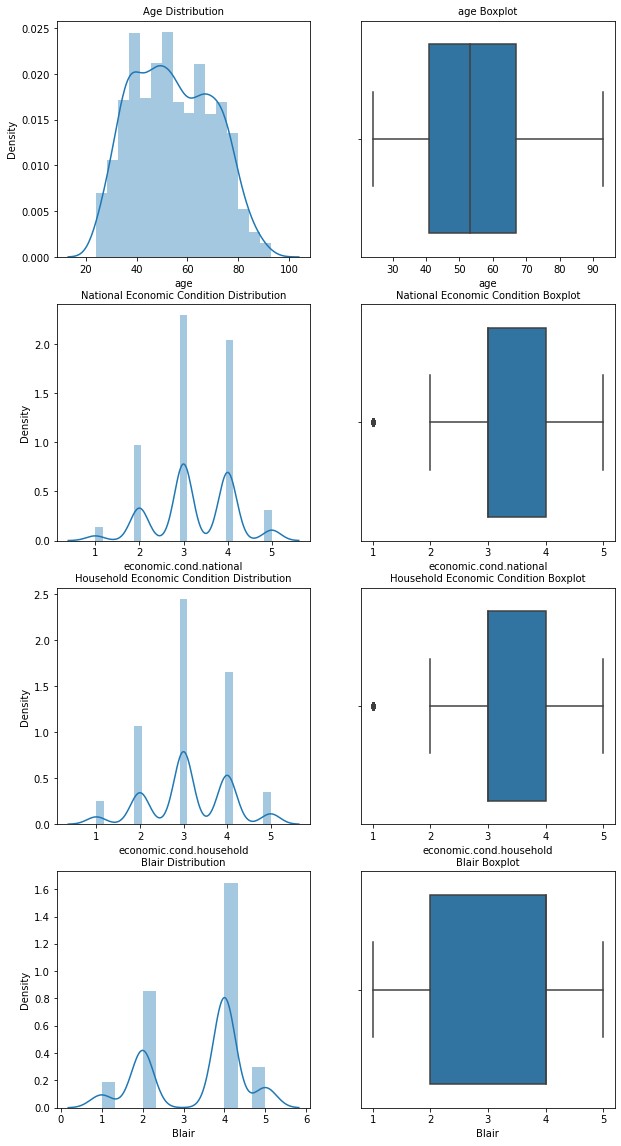

In [ ]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,20)
a = sns.distplot(df['age'] , ax=axes[0][0])
a.set_title("Age Distribution",fontsize=10)

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[0][1])
a.set_title("age Boxplot",fontsize=10)

a = sns.distplot(df['economic.cond.national'] , ax=axes[1][0])
a.set_title("National Economic Condition Distribution",fontsize=10)

a = sns.boxplot(df['economic.cond.national'] , orient = "v" , ax=axes[1][1])
a.set_title("National Economic Condition Boxplot",fontsize=10)


a = sns.distplot(df['economic.cond.household'] , ax=axes[2][0])
a.set_title("Household Economic Condition Distribution",fontsize=10)

a = sns.boxplot(df['economic.cond.household'] , orient = "v" , ax=axes[2][1])
a.set_title("Household Economic Condition Boxplot",fontsize=10)


a = sns.distplot(df['Blair'] , ax=axes[3][0])
a.set_title("Blair Distribution",fontsize=10)

a = sns.boxplot(df['Blair'] , orient = "v" , ax=axes[3][1])
a.set_title("Blair Boxplot",fontsize=10)

plt.show()




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed i

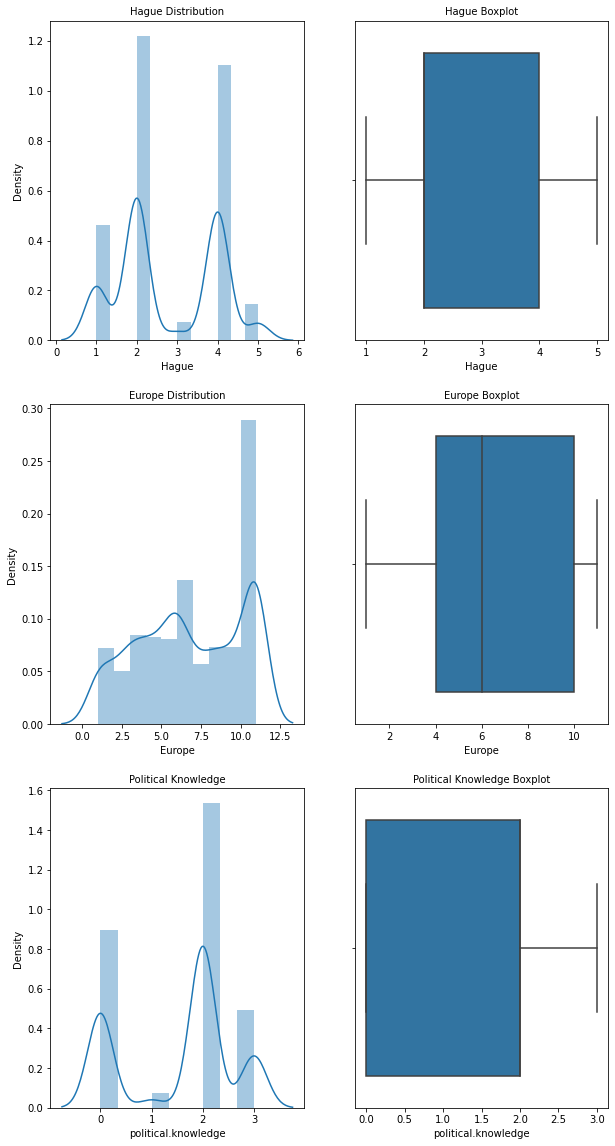

In [ ]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,20)
a = sns.distplot(df['Hague'] , ax=axes[0][0])
a.set_title("Hague Distribution",fontsize=10)

a = sns.boxplot(df['Hague'] , orient = "v" , ax=axes[0][1])
a.set_title("Hague Boxplot",fontsize=10)

a = sns.distplot(df['Europe'] , ax=axes[1][0])
a.set_title("Europe Distribution",fontsize=10)

a = sns.boxplot(df['Europe'] , orient = "v" , ax=axes[1][1])
a.set_title("Europe Boxplot",fontsize=10)


a = sns.distplot(df['political.knowledge'] , ax=axes[2][0])
a.set_title("Political Knowledge",fontsize=10)

a = sns.boxplot(df['political.knowledge'] , orient = "v" , ax=axes[2][1])
a.set_title("Political Knowledge Boxplot",fontsize=10)



plt.show()




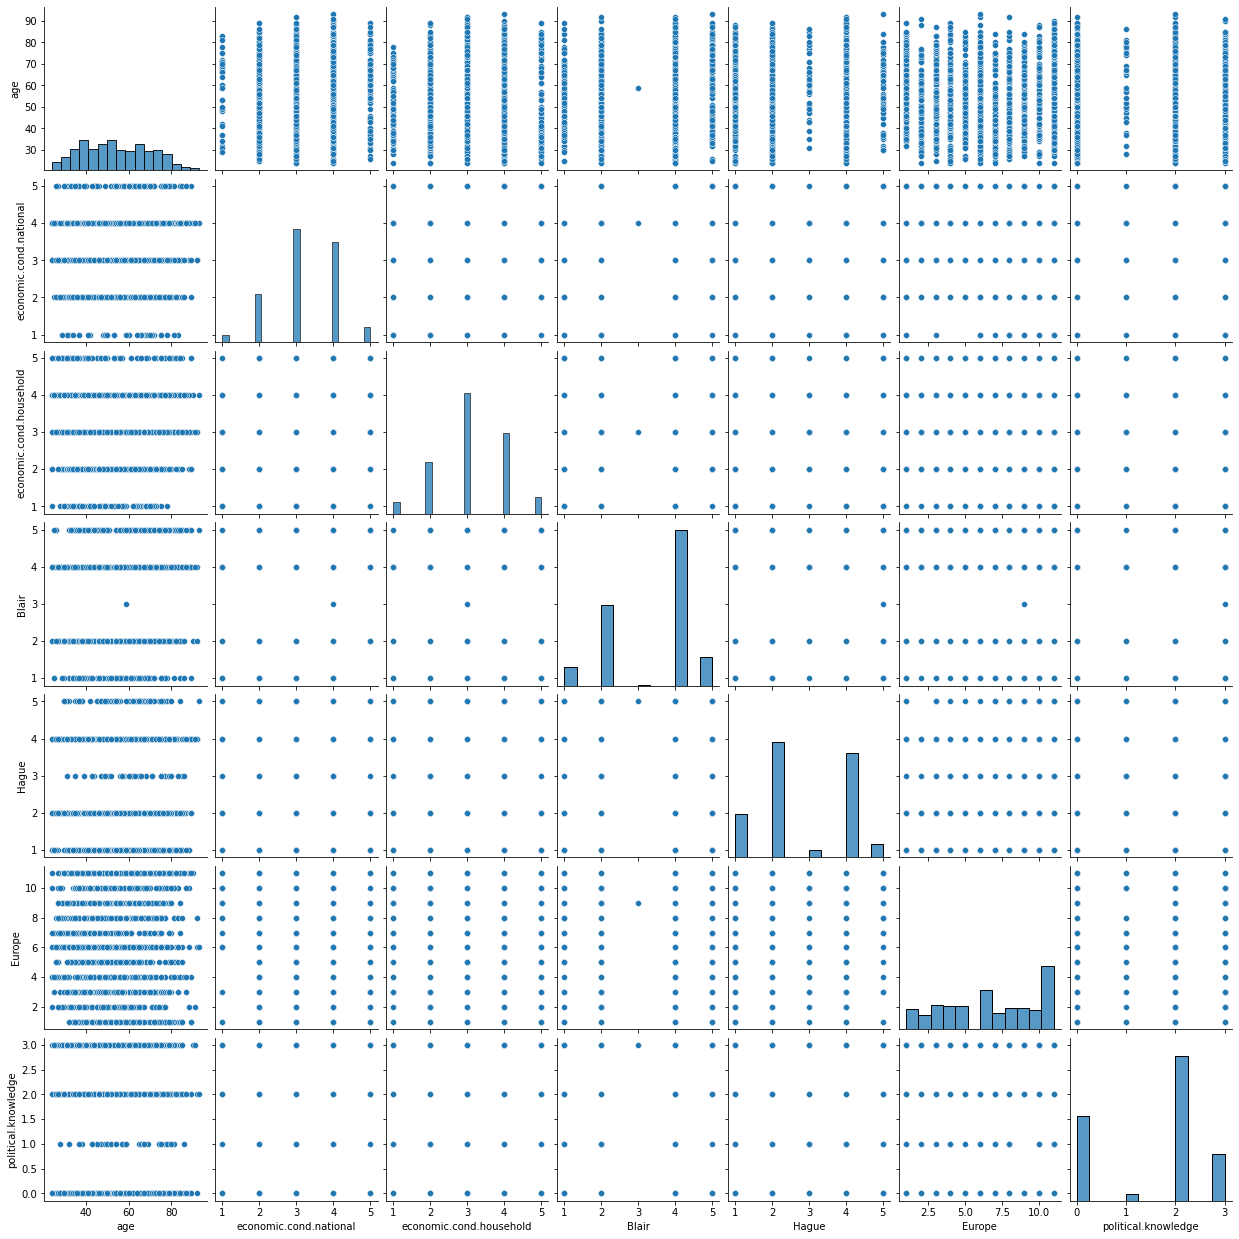

In [ ]:
sns.pairplot(df);

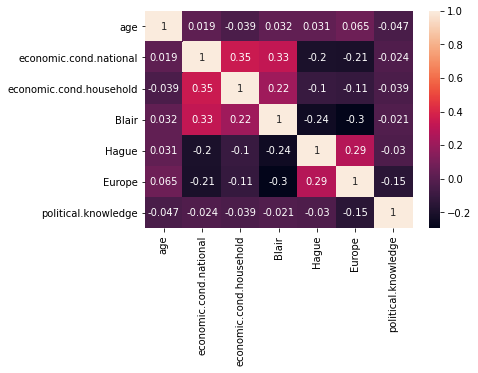

In [ ]:
sns.heatmap(df.corr(),annot=True);

In [ ]:
for feature in df.columns:
  if df[feature].dtype=='object':
    df[feature]=pd.Categorical(df[feature]).codes
    


In [ ]:
x=df.drop("vote",axis=1)
y=df.pop('vote')

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=1)

Apply Logistic Regression and LDA (Linear Discriminant Analysis). 

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn import metrics


In [ ]:
lrts=lr.score(x_test,y_test)
lrtr=lr.score(x_train,y_train)
print("The accuracy score for the training set is {}and for testing set is {}".format(lrtr,lrts))


The accuracy score for the training set is 0.8397375820056232and for testing set is 0.8231441048034934


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA=LinearDiscriminantAnalysis()
LDA.fit(x,y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
ldts=LDA.score(x_test,y_test)
ldtr=LDA.score(x_train,y_train)
print("The accuracy score for the training set is {}and for testing set is {}".format(ldtr,ldts))

The accuracy score for the training set is 0.8397375820056232and for testing set is 0.8209606986899564


Apply KNN Model and Naïve Bayes Model. Interpret the results

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [ ]:
KNN= KNeighborsClassifier(weights='distance')
KNN.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [ ]:
knnts=KNN.score(x_test,y_test)
knntr=KNN.score(x_train,y_train)
print("The accuracy score for the training set is {}and for testing set is {}".format(knntr,knnts))

The accuracy score for the training set is 0.9990627928772259and for testing set is 0.7838427947598253


In [ ]:
NB= GaussianNB()
NB.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
NBts=NB.score(x_test,y_test)
NBtr=NB.score(x_train,y_train)
print("The accuracy score for the training set is {}and for testing set is {}".format(NBtr,NBts))

The accuracy score for the training set is 0.8331771321462043and for testing set is 0.8253275109170306


Model Tuning, Bagging (Random Forest should be applied for Bagging) and Boosting. 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
gridsearchlr=GridSearchCV(lr,param_grid)
gridsearchlr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
gridsearchlr.best_params_

{'C': 1}

In [ ]:
lr_tuned=LogisticRegression(C=1)
lr_tuned.fit(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lrts_tuned=lr_tuned.score(x_test,y_test)
lrtr_tuned=lr_tuned.score(x_train,y_train)
print("The accuracy score for the training set is {}and for testing set is {}".format(lrtr_tuned,lrts_tuned))

The accuracy score for the training set is 0.8397375820056232and for testing set is 0.8231441048034934


In [ ]:
lda_param_grid = {"solver" : ["svd"],
        "tol" : [0.0001,0.0002,0.0003]}
gsLDA = GridSearchCV(LDA, param_grid = lda_param_grid)
gsLDA.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearDiscriminantAnalysis(n_components=None,
                                                  priors=None, shrinkage=None,
                                                  solver='svd',
                                                  store_covariance=False,
                                                  tol=0.0001),
             iid='deprecated', n_jobs=None,
             param_grid={'solver': ['svd'], 'tol': [0.0001, 0.0002, 0.0003]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
gsLDA.best_params_

{'solver': 'svd', 'tol': 0.0001}

In [ ]:
LDA_tuned=LinearDiscriminantAnalysis(solver='svd',tol=0.0001)
LDA_tuned.fit(x,y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
ldts_tuned=LDA_tuned.score(x_test,y_test)
ldtr_tuned=LDA_tuned.score(x_train,y_train)
print("The accuracy score for the training set is {}and for testing set is {}".format(ldtr_tuned,ldts_tuned))

The accuracy score for the training set is 0.8397375820056232and for testing set is 0.8209606986899564


In [ ]:
knn_params= {'n_neighbors':[3,5,11],'metric':['minkowski','manhattan'],'p':[1,2,3]}
gs_knn=GridSearchCV(KNN,knn_params)
gs_knn.fit(x_train,y_train)
gs_knn.best_params_


{'metric': 'minkowski', 'n_neighbors': 11, 'p': 2}

In [ ]:
KNN_tuned=KNeighborsClassifier(n_neighbors=11,metric='minkowski',p=2)
KNN_tuned.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [ ]:
knnts_tuned=KNN_tuned.score(x_test,y_test)
knntr_tuned=KNN_tuned.score(x_train,y_train)
print("The accuracy score for the training set is {}and for testing set is {}".format(knntr_tuned,knnts_tuned))

The accuracy score for the training set is 0.8331771321462043and for testing set is 0.7925764192139738


In [ ]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(NB,
                 params_NB)
                
gs_NB.fit(x_train, y_train)

gs_NB.best_params_


{'var_smoothing': 0.004328761281083057}

In [ ]:
NB_tuned=GaussianNB(var_smoothing=0.00432876128108305)
NB_tuned.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=0.00432876128108305)

In [ ]:
NBts_tuned=NB_tuned.score(x_test,y_test)
NBtr_tuned=NB_tuned.score(x_train,y_train)
print("The accuracy score for the training set is {}and for testing set is {}".format(NBtr_tuned,NBts_tuned))

The accuracy score for the training set is 0.8331771321462043and for testing set is 0.8253275109170306


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl= RandomForestClassifier()
rfcl.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.ensemble import BaggingClassifier
bgcl=BaggingClassifier(base_estimator=rfcl,random_state=1)
bgcl.fit(x_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
     

In [ ]:
bgts=bgcl.score(x_test,y_test)
bgtr=bgcl.score(x_train,y_train)
print("The accuracy score for the training set is {}and for testing set is {}".format(bgtr,bgts))

The accuracy score for the training set is 0.9550140581068416and for testing set is 0.8275109170305677


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abcl= AdaBoostClassifier(n_estimators=10,random_state=1)
abcl=abcl.fit(x_train, y_train)


In [ ]:
abts=abcl.score(x_test,y_test)
abtr=abcl.score(x_train,y_train)
print("The accuracy score for the training set is {}and for testing set is {}".format(abtr,abts))

The accuracy score for the training set is 0.8397375820056232and for testing set is 0.8231441048034934


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl=GradientBoostingClassifier(n_estimators=30,random_state=1)
gbcl=gbcl.fit(x_train,y_train)


In [ ]:
gbts=gbcl.score(x_test,y_test)
gbtr=gbcl.score(x_train,y_train)
print("The accuracy score for the training set is {}and for testing set is {}".format(gbtr,gbts))

The accuracy score for the training set is 0.8575445173383318and for testing set is 0.8384279475982532


Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model.



In [ ]:
models= [lr,LDA,KNN,NB,lr_tuned,LDA_tuned,KNN_tuned,NB_tuned,bgcl,abcl,gbcl]
scores_train=[]
scores_test=[]
for i in models:
 scores_train.append(i.score(x_train,y_train))
 scores_test.append(i.score(x_test,y_test))
print(pd.DataFrame({'Training Score' :scores_train,'Test Score': scores_test},
            index=['LR','LDA','KNN', 'NB','LR_Tuned','LDA_Tuned','KNN_Tuned','NB_Tuned','Bagging','AdaBoost','GradientBoost']))



               Training Score  Test Score
LR                   0.839738    0.823144
LDA                  0.839738    0.820961
KNN                  0.999063    0.783843
NB                   0.833177    0.825328
LR_Tuned             0.839738    0.823144
LDA_Tuned            0.839738    0.820961
KNN_Tuned            0.833177    0.792576
NB_Tuned             0.833177    0.825328
Bagging              0.955014    0.827511
AdaBoost             0.839738    0.823144
GradientBoost        0.857545    0.838428


In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [ ]:
lr_test_predict=lr.predict(x_test)
lr_train_predict=lr.predict(x_train)
lr_tuned_test_predict=lr_tuned.predict(x_test)
lr_tuned_train_predict=lr_tuned.predict(x_train)
LDA_test_predict=LDA.predict(x_test)
LDA_train_predict=LDA.predict(x_train)
LDA_tuned_test_predict=LDA_tuned.predict(x_test)
LDA_tuned_train_predict=LDA_tuned.predict(x_train)
KNN_test_predict=KNN.predict(x_test)
KNN_train_predict=KNN.predict(x_train)
KNN_tuned_test_predict=KNN_tuned.predict(x_test)
KNN_tuned_train_predict=KNN_tuned.predict(x_train)
NB_test_predict=NB.predict(x_test)
NB_train_predict=NB.predict(x_train)
NB_tuned_test_predict=NB_tuned.predict(x_test)
NB_tuned_train_predict=NB_tuned.predict(x_train)
bg_test_predict=bgcl.predict(x_test)
bg_train_predict=bgcl.predict(x_train)
ab_test_predict=abcl.predict(x_test)
ab_train_predict=abcl.predict(x_train)
gb_test_predict=gbcl.predict(x_test)
gb_train_predict=gbcl.predict(x_train)





In [ ]:
#lr 
cf_test= classification_report(y_test,lr_test_predict)
cf_train=classification_report(y_train,lr_train_predict)
auc_test= roc_auc_score(y_test, lr_test_predict)
auc_train=roc_auc_score(y_train,lr_train_predict)
roc_curve_test=roc_curve(y_test,lr_test_predict)
roc_curve_train= roc_curve(y_train,lr_train_predict)
print(cf_test)
print(cf_train)
print(auc_test)
print(auc_train)


              precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067

0.772045028142589
0.7986210146709285


In [ ]:
#lr_tuned
cf_test= classification_report(y_test,lr_tuned_test_predict)
cf_train=classification_report(y_train,lr_tuned_train_predict)
auc_test= roc_auc_score(y_test, lr_tuned_test_predict)
auc_train=roc_auc_score(y_train,lr_tuned_train_predict)
roc_curve_test=roc_curve(y_test,lr_tuned_test_predict)
roc_curve_train= roc_curve(y_train,lr_tuned_train_predict)
print(cf_test)
print(cf_train)
print(auc_test)
print(auc_train)


              precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067

0.772045028142589
0.7986210146709285


In [ ]:
#LDA
cf_test= classification_report(y_test,LDA_test_predict)
cf_train=classification_report(y_train,LDA_train_predict)
auc_test= roc_auc_score(y_test, LDA_test_predict)
auc_train=roc_auc_score(y_train,LDA_train_predict)
roc_curve_test=roc_curve(y_test,LDA_test_predict)
roc_curve_train= roc_curve(y_train,LDA_train_predict)
print(cf_test)
print(cf_train)
print(auc_test)
print(auc_train)

              precision    recall  f1-score   support

           0       0.70      0.65      0.67       130
           1       0.86      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458

              precision    recall  f1-score   support

           0       0.77      0.70      0.73       332
           1       0.87      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067

0.7681988742964352
0.8002725186460126


In [ ]:
#LDA tuned
cf_test= classification_report(y_test,LDA_tuned_test_predict)
cf_train=classification_report(y_train,LDA_tuned_train_predict)
auc_test= roc_auc_score(y_test, LDA_tuned_test_predict)
auc_train=roc_auc_score(y_train,LDA_tuned_train_predict)
roc_curve_test=roc_curve(y_test,LDA_tuned_test_predict)
roc_curve_train= roc_curve(y_train,LDA_tuned_train_predict)
print(cf_test)
print(cf_train)
print(auc_test)
print(auc_train)

              precision    recall  f1-score   support

           0       0.70      0.65      0.67       130
           1       0.86      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458

              precision    recall  f1-score   support

           0       0.77      0.70      0.73       332
           1       0.87      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067

0.7681988742964352
0.8002725186460126


In [ ]:
#KNN
cf_test= classification_report(y_test,KNN_test_predict)
cf_train=classification_report(y_train,KNN_train_predict)
auc_test= roc_auc_score(y_test, KNN_test_predict)
auc_train=roc_auc_score(y_train,KNN_train_predict)
roc_curve_test=roc_curve(y_test,KNN_test_predict)
roc_curve_train= roc_curve(y_train,KNN_train_predict)
print(cf_test)
print(cf_train)
print(auc_test)
print(auc_train)

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       130
           1       0.85      0.85      0.85       328

    accuracy                           0.78       458
   macro avg       0.73      0.73      0.73       458
weighted avg       0.78      0.78      0.78       458

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067

0.7329971857410882
0.9993197278911565


In [ ]:
#KNN tuned
cf_test= classification_report(y_test,KNN_tuned_test_predict)
cf_train=classification_report(y_train,KNN_tuned_train_predict)
auc_test= roc_auc_score(y_test, KNN_tuned_test_predict)
auc_train=roc_auc_score(y_train,KNN_tuned_train_predict)
roc_curve_test=roc_curve(y_test,KNN_tuned_test_predict)
roc_curve_train= roc_curve(y_train,KNN_tuned_train_predict)
print(cf_test)
print(cf_train)
print(auc_test)
print(auc_train)

              precision    recall  f1-score   support

           0       0.64      0.60      0.62       130
           1       0.85      0.87      0.86       328

    accuracy                           0.79       458
   macro avg       0.75      0.73      0.74       458
weighted avg       0.79      0.79      0.79       458

              precision    recall  f1-score   support

           0       0.77      0.67      0.71       332
           1       0.86      0.91      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.79      0.80      1067
weighted avg       0.83      0.83      0.83      1067

0.7344512195121952
0.7872530940086878


In [ ]:
#NB
cf_test= classification_report(y_test,NB_test_predict)
cf_train=classification_report(y_train,NB_train_predict)
auc_test= roc_auc_score(y_test, NB_test_predict)
auc_train=roc_auc_score(y_train,NB_train_predict)
roc_curve_test=roc_curve(y_test,NB_test_predict)
roc_curve_train= roc_curve(y_train,NB_train_predict)
print(cf_test)
print(cf_train)
print(auc_test)
print(auc_train)

              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067

0.7944652908067541
0.8029423817719858


In [ ]:
#NB tuned
cf_test= classification_report(y_test,NB_tuned_test_predict)
cf_train=classification_report(y_train,NB_tuned_train_predict)
auc_test= roc_auc_score(y_test, NB_tuned_test_predict)
auc_train=roc_auc_score(y_train,NB_tuned_train_predict)
roc_curve_test=roc_curve(y_test,NB_tuned_test_predict)
roc_curve_train= roc_curve(y_train,NB_tuned_train_predict)
print(cf_test)
print(cf_train)
print(auc_test)
print(auc_train)

              precision    recall  f1-score   support

           0       0.70      0.67      0.69       130
           1       0.87      0.89      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.78      0.78       458
weighted avg       0.82      0.83      0.82       458

              precision    recall  f1-score   support

           0       0.76      0.68      0.72       332
           1       0.86      0.90      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.79      0.80      1067
weighted avg       0.83      0.83      0.83      1067

0.7782129455909944
0.7905561019588558


In [ ]:
#bgcl

cf_test= classification_report(y_test,bg_test_predict)
cf_train=classification_report(y_train,bg_train_predict)
auc_test= roc_auc_score(y_test, bg_test_predict)
auc_train=roc_auc_score(y_train,bg_train_predict)
roc_curve_test=roc_curve(y_test,bg_test_predict)
roc_curve_train= roc_curve(y_train,bg_train_predict)
print(cf_test)
print(cf_train)
print(auc_test)
print(auc_train)

              precision    recall  f1-score   support

           0       0.70      0.68      0.69       130
           1       0.87      0.89      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.78      0.79       458
weighted avg       0.83      0.83      0.83       458

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       332
           1       0.95      0.98      0.97       735

    accuracy                           0.96      1067
   macro avg       0.96      0.94      0.95      1067
weighted avg       0.96      0.96      0.95      1067

0.7820590994371482
0.937619867223998


In [ ]:
#abcl
cf_test= classification_report(y_test,ab_test_predict)
cf_train=classification_report(y_train,ab_train_predict)
auc_test= roc_auc_score(y_test, ab_test_predict)
auc_train=roc_auc_score(y_train,ab_train_predict)
roc_curve_test=roc_curve(y_test,ab_test_predict)
roc_curve_train= roc_curve(y_train,ab_train_predict)
print(cf_test)
print(cf_train)
print(auc_test)
print(auc_train)

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       130
           1       0.88      0.88      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067

0.7836538461538463
0.8027497746086386


In [ ]:
#gbcl
cf_test= classification_report(y_test,gb_test_predict)
cf_train=classification_report(y_train,gb_train_predict)
auc_test= roc_auc_score(y_test, gb_test_predict)
auc_train=roc_auc_score(y_train,gb_train_predict)
roc_curve_test=roc_curve(y_test,gb_test_predict)
roc_curve_train= roc_curve(y_train,gb_train_predict)
print(cf_test)
print(cf_train)
print(auc_test)
print(auc_train)

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       130
           1       0.89      0.89      0.89       328

    accuracy                           0.84       458
   macro avg       0.80      0.80      0.80       458
weighted avg       0.84      0.84      0.84       458

              precision    recall  f1-score   support

           0       0.82      0.70      0.75       332
           1       0.87      0.93      0.90       735

    accuracy                           0.86      1067
   macro avg       0.85      0.81      0.83      1067
weighted avg       0.86      0.86      0.85      1067

0.8012898686679175
0.8131976887140399


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


TypeError: ignored

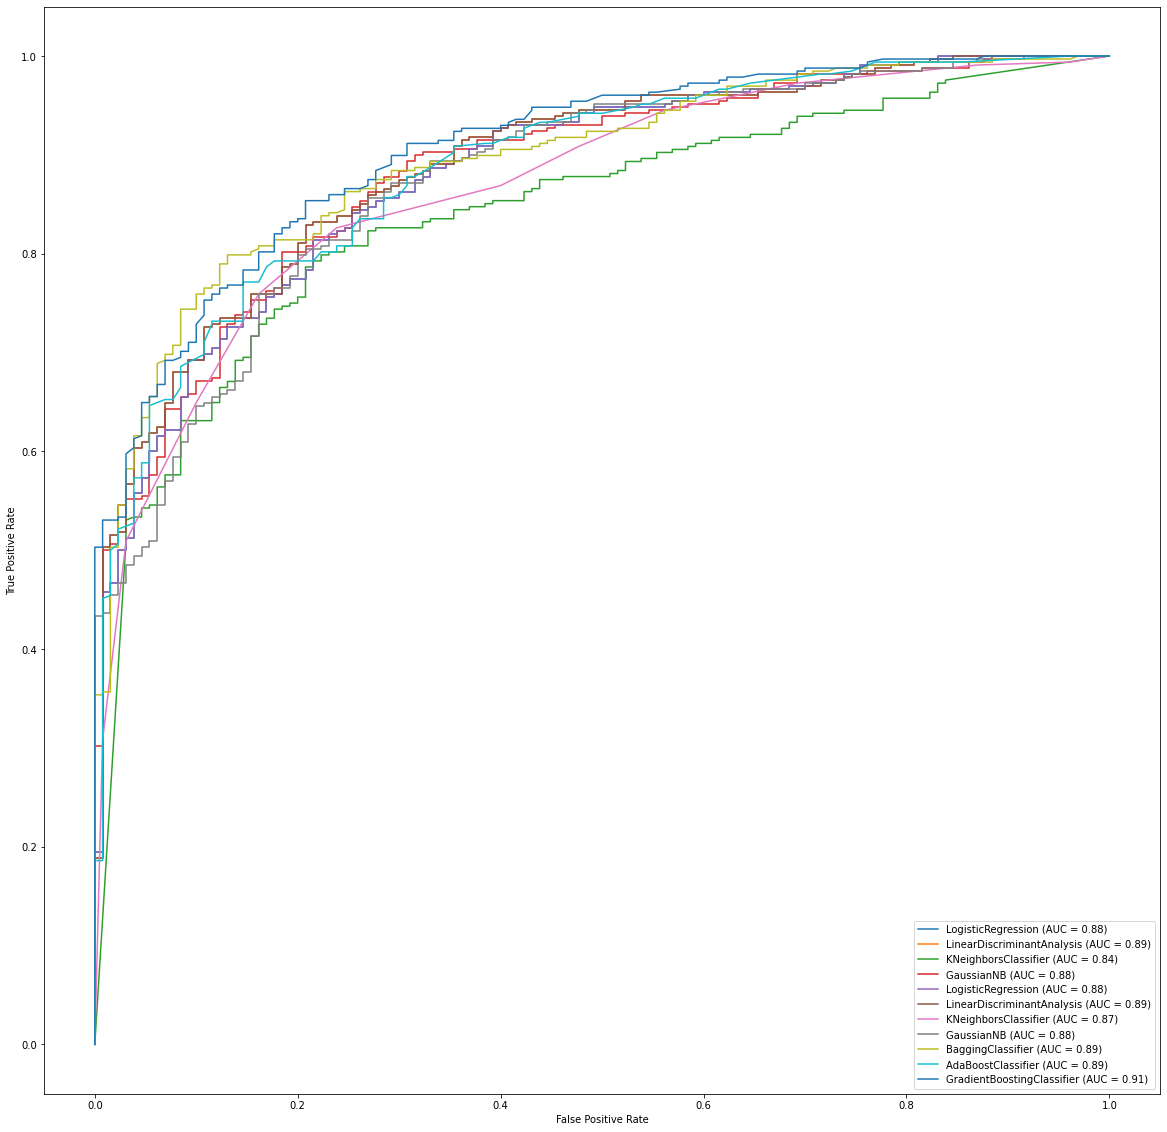

In [ ]:
plt.figure(figsize=(20,20))
from sklearn.metrics import plot_roc_curve

ax = plt.gca()
for i in models:
    plot_roc_curve(i, x_test, y_test, ax=ax)


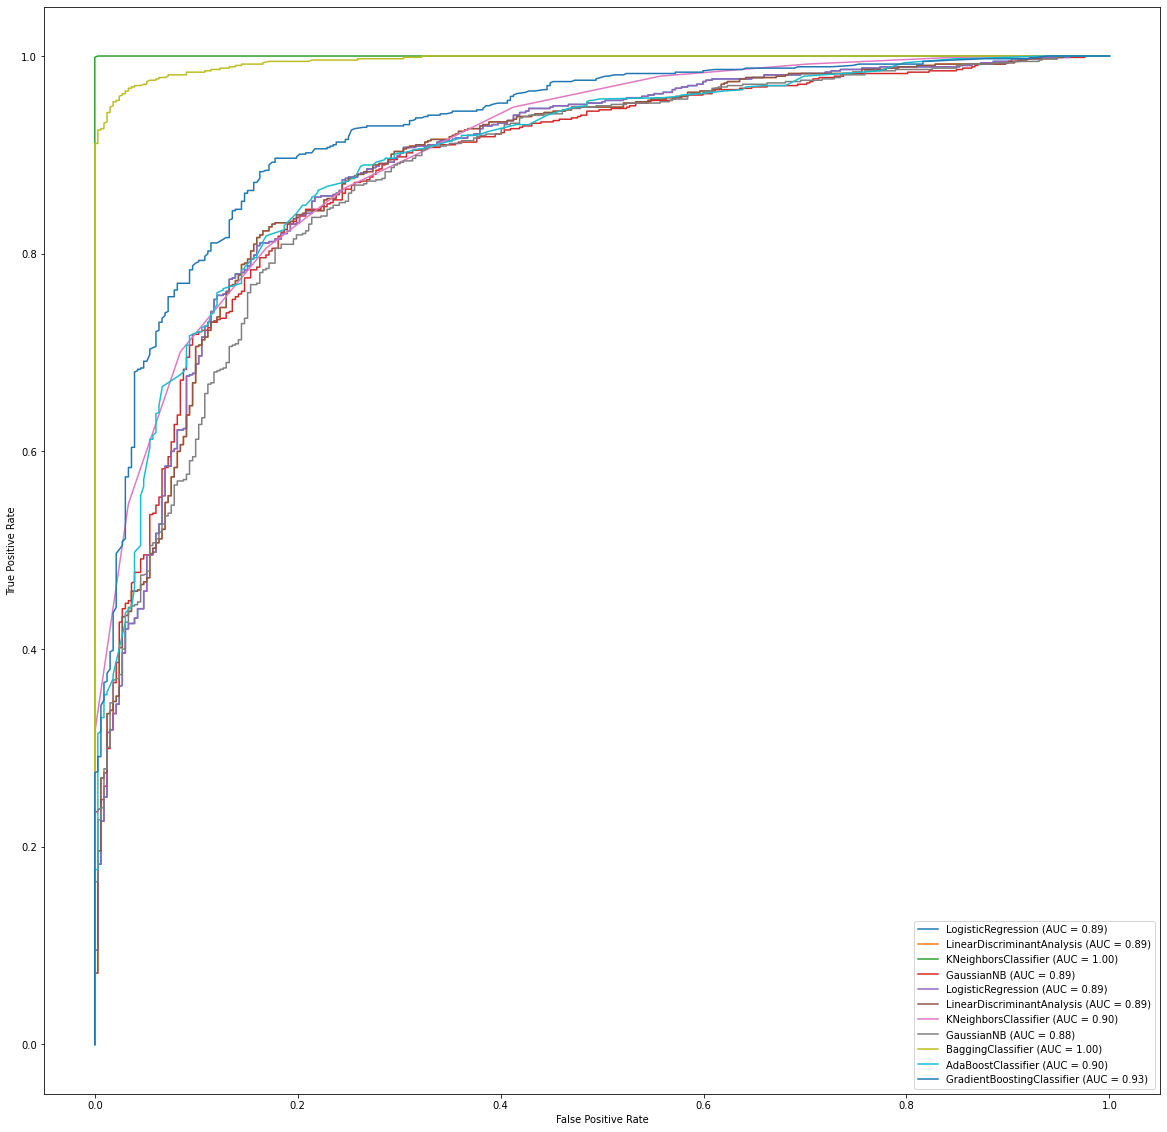

In [ ]:
plt.figure(figsize=(20,20))
from sklearn.metrics import plot_roc_curve

ax = plt.gca()
for i in models:
    plot_roc_curve(i, x_train, y_train, ax=ax)


Problem Set 2 

In [17]:
import nltk
nltk.download('inaugural')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')


[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [3]:
from nltk.stem.snowball import SnowballStemmer
import json 
import re 
import string 
from sklearn.feature_extraction.text import TfidfVectorizer

Find the number of characters, words and sentences for the mentioned documents.

In [18]:
print(len(inaugural.raw('1941-Roosevelt.txt')))
print(len(inaugural.words('1941-Roosevelt.txt')))
print(len(inaugural.sents('1941-Roosevelt.txt')))

7571
1536
68


In [20]:
print(len(inaugural.raw('1961-Kennedy.txt')))
print(len(inaugural.words('1961-Kennedy.txt')))
print(len(inaugural.sents('1961-Kennedy.txt')))

7618
1546
52


In [21]:
print(len(inaugural.raw('1973-Nixon.txt')))
print(len(inaugural.words('1973-Nixon.txt')))
print(len(inaugural.sents('1973-Nixon.txt')))

9991
2028
69


Remove all the stopwords from all the three speeches.

In [63]:
Stopwords= nltk.corpus.stopwords.words('english')+list(string.punctuation)
all_words=(w.lower()for w in inaugural.words('1941-Roosevelt.txt') )
all_words_clean=[word for word in all_words if word not in Stopwords]
all_words_clean_freq=nltk.FreqDist(all_words_clean)


In [65]:
word_features=[item[0] for item in all_words_clean_freq.most_common(20)]
word_features

['--',
 'nation',
 'know',
 'spirit',
 'life',
 'democracy',
 'us',
 'people',
 'america',
 'years',
 'freedom',
 'human',
 'men',
 'new',
 'body',
 'mind',
 'speaks',
 'day',
 'states',
 'government']

In [39]:

all_words=(w.lower()for w in inaugural.words('1961-Kennedy.txt') )
all_words_clean=[word for word in all_words if word not in Stopwords]
all_words_freq=nltk.FreqDist(all_words_clean)

In [69]:
word_features=[item[0] for item in all_words_freq.most_common(20)]
print(word_features)

['--', 'nation', 'know', 'spirit', 'life', 'democracy', 'us', 'people', 'america', 'years', 'freedom', 'human', 'men', 'new', 'body', 'mind', 'speaks', 'day', 'states', 'government']


In [42]:
all_words=(w.lower()for w in inaugural.words('1973-Nixon.txt') )
all_words_clean=[word for word in all_words if word not in Stopwords]
all_words_freq=nltk.FreqDist(all_words_clean)

In [44]:
word_features=[item[0] for item in all_words_freq.most_common(20)]
word_features

['us',
 'let',
 'america',
 'peace',
 'world',
 '--',
 'new',
 'nation',
 'responsibility',
 'government',
 'great',
 'home',
 'abroad',
 'together',
 'years',
 'shall',
 'policies',
 'role',
 'make',
 'every']

Roosevelt


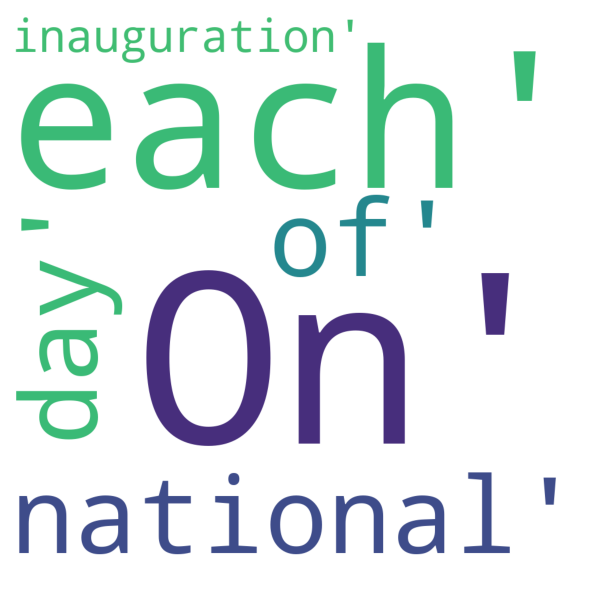

In [76]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1000, height = 1000, background_color='white',stopwords=Stopwords, random_state=1000).generate(str(inaugural.words('1941-Roosevelt.txt')))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 
print('Roosevelt')
plt.show()

Kennedy


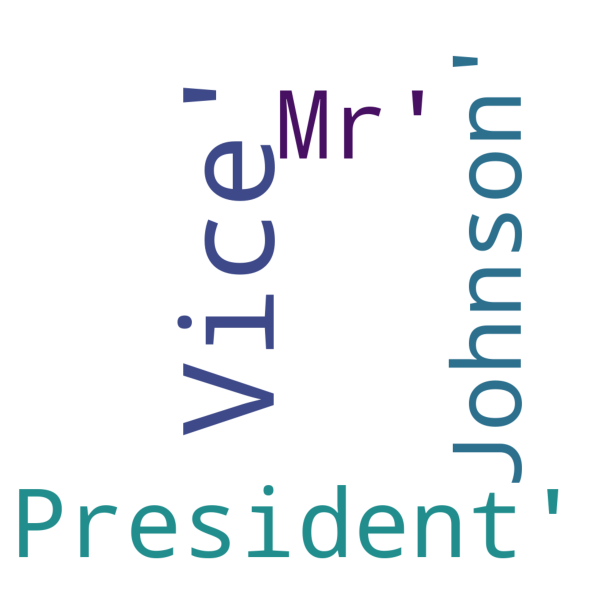

In [77]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1000, height = 1000, background_color='white',stopwords=Stopwords,random_state=1000).generate(str(inaugural.words('1961-Kennedy.txt')))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 
print('Kennedy')
plt.show()

Nixon


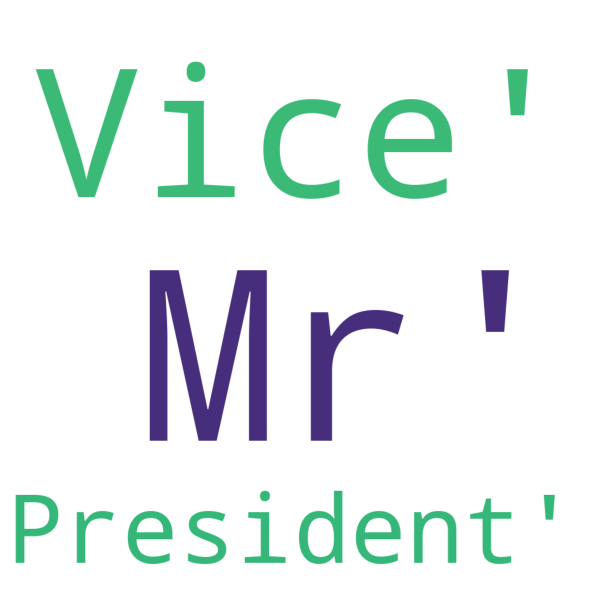

In [78]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1000, height = 1000, background_color='white',stopwords=Stopwords,random_state=1000).generate(str(inaugural.words('1973-Nixon.txt')))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0)
print('Nixon') 
plt.show()